In [ ]:
# install and import the libraries

In [ ]:
!pip install "httpx[http2,brotli]" parsel

In [ ]:
pip install scrapfly-sdk

In [ ]:
pip install beautifulsoup4

In [ ]:
pip install requests

In [5]:
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import requests
import pandas as pd
import httpx
from httpx import AsyncClient
import json
from collections import defaultdict
import asyncio
import json
import re
from datetime import datetime
from pathlib import Path
import re
from typing import List, Optional
from urllib.parse import urlencode
from scrapfly import ScrapflyClient, ScrapeConfig, ScrapeApiResponse
from parsel import Selector
import seaborn as sns

In [ ]:
# print the 1st SRP: hotel names, hotel address, rating, price for hotels in Salzburg for 1 night 23.1.2025 - 24.1.2025

In [10]:
url = "https://www.booking.com/searchresults.en-gb.html?ss=Salzburg%2C+Salzburg%2C+Austria&ssne=Lindau&ssne_untouched=Lindau&label=gen173nr-1FCAQoggJCC3JlZ2lvbl80MTI3SDFYBGgOiAEBmAExuAEZyAEM2AEB6AEB-AEDiAIBqAIDuAKd_fCrBsACAdICJDY1YjVjZDFiLWE0NjEtNDNkMi1hZjBmLTkyNDJjOTBlODg1ZNgCBeACAQ&aid=304142&lang=en-gb&sb=1&src_elem=sb&src=searchresults&dest_id=-1989985&dest_type=city&ac_position=0&ac_click_type=b&ac_langcode=en&ac_suggestion_list_length=5&search_selected=true&search_pageview_id=b4b9541203870147&ac_meta=GhBiNGI5NTQxMjAzODcwMTQ3IAAoATICZW46CFNhbHpidXJnQABKAFAA&checkin=2025-01-23&checkout=2025-01-24&group_adults=2&no_rooms=1&group_children=0"

headers={"User-Agent":"Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/102.0.5042.108 Safari/537.36"}

response = requests.get(url, headers=headers)
soup = BeautifulSoup(response.content, 'html.parser')

print(response.status_code)

hotel_results = []

200


In [11]:
# find the metadata
for el in soup.find_all("div", {"data-testid": "property-card"}):

  hotel_results.append({
            "name": el.find("div", {"data-testid": "title"}).text.strip(),
            "link": el.find("a", {"data-testid": "title-link"})["href"],
            "location": el.find("span", {"data-testid": "address"}).text.strip(),
            "pricing": el.find("span", {"data-testid": "price-and-discounted-price"}).text.strip(),
            "rating": el.find("div", {"data-testid": "review-score"}).text.strip().split(" ")[0],
            "review_count": el.find("div", {"data-testid": "review-score"}).text.strip().split(" ")[1],
            "thumbnail": el.find("img", {"data-testid": "image"})['src']
        })

AttributeError: ignored

In [12]:
print(hotel_results)

[{'name': 'Atel Hotel Lasserhof', 'link': 'https://www.booking.com/hotel/at/hotellasserhof.en-gb.html?label=gen173nr-1FCAQoggJCC3JlZ2lvbl80MTI3SDFYBGgOiAEBmAExuAEZyAEM2AEB6AEB-AEDiAIBqAIDuAKd_fCrBsACAdICJDY1YjVjZDFiLWE0NjEtNDNkMi1hZjBmLTkyNDJjOTBlODg1ZNgCBeACAQ&aid=304142&ucfs=1&arphpl=1&checkin=2025-01-23&checkout=2025-01-24&dest_id=-1989985&dest_type=city&group_adults=2&req_adults=2&no_rooms=1&group_children=0&req_children=0&hpos=1&hapos=1&sr_order=popularity&srpvid=bf6e91f079810120&srepoch=1702759522&all_sr_blocks=0_0_2_0_0&highlighted_blocks=0_0_2_0_0&matching_block_id=0_0_2_0_0&sr_pri_blocks=0_0_2_0_0__8280&from_sustainable_property_sr=1&from=searchresults#hotelTmpl', 'location': 'Salzburg', 'pricing': 'US$90', 'rating': '7.3Good', 'review_count': '3,101', 'thumbnail': 'https://cf.bstatic.com/xdata/images/hotel/square200/119558069.jpg?k=bc88e8ca15856bf2c08e5cb109876e22e098743ab96af6057fe8ac00d9f6fe7f&o='}, {'name': 'Leonardo Boutique Hotel Salzburg Gablerbräu', 'link': 'https://ww

In [13]:
# convert the metadata of the 1st SRP to dataframe
dataframe=pd.DataFrame(hotel_results, columns=['name','link','location','pricing','rating', 'review_count', 'thumbnail'])
print (dataframe)
dataframe.to_csv('out.csv')

                                                 name  \
0                                Atel Hotel Lasserhof   
1         Leonardo Boutique Hotel Salzburg Gablerbräu   
2                            Altstadt Hotel Stadtkrug   
3                              Hotel Bristol Salzburg   
4                     Altstadt Hotel Hofwirt Salzburg   
5                         Radisson Blu Hotel Altstadt   
6                        Goldgasse Apartments de Luxe   
7                                         Villa Elisa   
8                                     MIRABELLE Homes   
9                      Hotel Markus Sittikus Salzburg   
10                                 Parkhotel Brunauer   
11                    Leonardo Hotel Salzburg Airport   
12                                 COOL MAMA Salzburg   
13                                morand I Apartments   
14                        Hotel Zum Hirschen Salzburg   
15                                      My Wonderland   
16                          Eas

In [ ]:
dataframe.head()

,name,link,location,pricing,rating,review_count,thumbnail
0,Atel Hotel Lasserhof,https://www.booking.com/hotel/at/hotellasserho...,Salzburg,US$91,7.3Good,"3,097",https://cf.bstatic.com/xdata/images/hotel/squa...
1,Villa Elisa,https://www.booking.com/hotel/at/villa-elisa-s...,"Elisabeth-Vorstadt, Salzburg",US$109,9.1Superb,"1,092",https://cf.bstatic.com/xdata/images/hotel/squa...
2,Leonardo Boutique Hotel Salzburg Gablerbräu,https://www.booking.com/hotel/at/star-inn-salz...,"Altstadt, Salzburg",US$123,8.3Very,good,https://cf.bstatic.com/xdata/images/hotel/squa...
3,Altstadt Hotel Stadtkrug,https://www.booking.com/hotel/at/stadtkrug.en-...,"Altstadt, Salzburg",US$273,8.4Very,good,https://cf.bstatic.com/xdata/images/hotel/squa...
4,Hotel Bristol Salzburg,https://www.booking.com/hotel/at/hotelbristols...,"Altstadt, Salzburg",US$731,8.9Fabulous,894,https://cf.bstatic.com/xdata/images/hotel/squa...


In [ ]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22 entries, 0 to 21
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   name          22 non-null     object
 1   link          22 non-null     object
 2   location      22 non-null     object
 3   pricing       22 non-null     object
 4   rating        22 non-null     object
 5   review_count  22 non-null     object
 6   thumbnail     22 non-null     object
dtypes: object(7)
memory usage: 1.3+ KB


In [ ]:
print(dataframe["rating"].unique())

['7.3Good' '9.1Superb' '8.3Very' '8.4Very' '8.9Fabulous' '8.7Fabulous'
 '8.1Very' '10Exceptional' '7.8Good' '8.8Fabulous' '9.2Superb'
 '9.5Exceptional' '8.5Very' '4.0Review' '4.8Review' '2.0Review']


In [ ]:
# replace the unique rating values by fewer unique categories
dataframe['rating'] = dataframe['rating'].str.replace('2.0Review','2')
dataframe['rating'] = dataframe['rating'].str.replace('7.3Good','7')
dataframe['rating'] = dataframe['rating'].str.replace('9.1Superb','9')
dataframe['rating'] = dataframe['rating'].str.replace('8.3Very','8')
dataframe['rating'] = dataframe['rating'].str.replace('8.4Very','8')
dataframe['rating'] = dataframe['rating'].str.replace('8.9Fabulous','8')
dataframe['rating'] = dataframe['rating'].str.replace('8.7Fabulous','8')
dataframe['rating'] = dataframe['rating'].str.replace('8.1Very','8')
dataframe['rating'] = dataframe['rating'].str.replace('8.0Very','8')
dataframe['rating'] = dataframe['rating'].str.replace('10Exceptional','10')
dataframe['rating'] = dataframe['rating'].str.replace('7.8Good','7')
dataframe['rating'] = dataframe['rating'].str.replace('8.8Fabulous','8')
dataframe['rating'] = dataframe['rating'].str.replace('9.2Superb','9')
dataframe['rating'] = dataframe['rating'].str.replace('9.5Exceptional','9')
dataframe['rating'] = dataframe['rating'].str.replace('8.5Very','8')
dataframe['rating'] = dataframe['rating'].str.replace('4.0Review','4')
dataframe['rating'] = dataframe['rating'].str.replace('4.8Review','4')


<ipython-input-157-bb20fc698819>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  dataframe['rating'] = dataframe['rating'].str.replace('2.0Review','2')
<ipython-input-157-bb20fc698819>:3: FutureWarning: The default value of regex will change from True to False in a future version.
  dataframe['rating'] = dataframe['rating'].str.replace('7.3Good','7')
<ipython-input-157-bb20fc698819>:4: FutureWarning: The default value of regex will change from True to False in a future version.
  dataframe['rating'] = dataframe['rating'].str.replace('9.1Superb','9')
<ipython-input-157-bb20fc698819>:5: FutureWarning: The default value of regex will change from True to False in a future version.
  dataframe['rating'] = dataframe['rating'].str.replace('8.3Very','8')
<ipython-input-157-bb20fc698819>:6: FutureWarning: The default value of regex will change from True to False in a future version.
  dataframe['rating'] = dataframe['rating'].str.replace('8.4Ve

<Axes: >

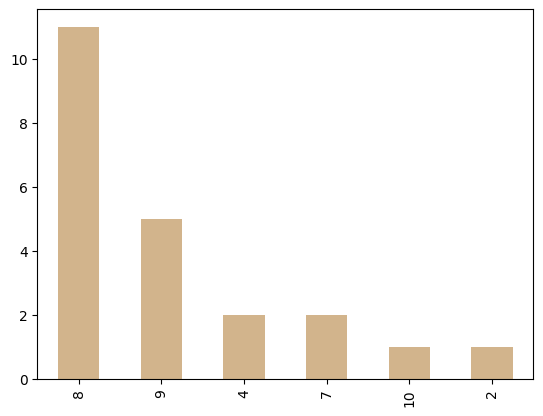

In [ ]:
# plot value counts for each rating category in descending order
# the majority of hotels available have the rating category 8
dataframe = dataframe.sort_values('rating')
dataframe.rating.value_counts().plot(kind='bar', color='tan')


In [ ]:
# https://scrapfly.io/blog/how-to-scrape-bookingcom/
# https://www.scrapingdog.com/blog/scrape-bookingcom/
# https://dev.to/serpdogapi/web-scraping-bookingcom-using-python-2be
# https://apify.com/voyager/booking-scraper
# https://www.scrapingbee.com/blog/web-scraping-booking/
# https://en.wikipedia.org/wiki/Booking.com